# 1-Dimensional Convolutional Neural Network

## Data Importation and Train/Test Splitting

In [1]:
from modules import data 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

records = data.from_json('./data/json/ind.json')
[record for record in records if (record.trial == 1 or record.trial == 2)]
for record in records:
    record.min_quality(90)
    
records_df = data.to_df(records)
labels = records_df['Label']
records_df = data.standard_scaler(records_df.drop('Label', axis=1))
records_df['Label'] = labels
records_df['Label'] = label_encoder.fit_transform(records_df['Label'])
records_df

Compound,Benzaldehyde,"Benzene, 1-Methyl-4-(1-Methylethyl)",Butylated Hydroxytoluene,"Cycloheptasiloxane, Tetradecamethyl","Cyclohexasiloxane, Dodecamethyl","Cyclopentasiloxane, Decamethyl","Cyclotetrasiloxane, Octamethyl","Cyclotrisiloxane, Hexamethyl",D-Limonene,Decane,...,"Nonane, 3,7-Dimethyl",Trans-2-Tridecenal,"Tricyclo[2.2.1.0(2,6)]Heptane, 1,3,3-Trimethyl","2,6-Dimethyl-4-(3-Methylidenecyclopentyl)Phenol","Quinoline, 3-Methyl","1-Hexadecanamine, N,N-Dimethyl","11H-Dibenzo[B,E][1,4]Diazepin-11-One, 5,10-Dihydro-5-[3-(Methylamino)Propyl]","3,5-Di-Tert-Butyl-4-Hydroxyphenylpropionic Acid","Heptane, 4-Methyl",Label
Ae LB BS 0h 1,-0.338973,0.024042,-0.417989,-0.588951,-0.323245,-0.498495,-0.475140,0.389828,-0.320498,-0.243314,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,0
Ae LB BS 24h 1,-0.544251,-0.307311,-0.366973,-0.639182,-0.405947,-0.552383,-0.516155,-0.146539,-0.336930,-0.388611,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,0
Ae LB BS 3h 1,0.674644,-0.307311,-0.350058,-0.181445,0.042492,-0.324518,-0.197919,0.640367,-0.204172,-0.133123,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,0
Ae LB BS 9h 1,-0.293840,-0.307311,-0.455776,-0.868044,-0.587808,-0.676792,-0.859775,0.141617,-0.285800,-0.388611,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,0
Ae LB Ctrl 24h 1,-0.374538,-0.307311,-0.340775,-0.559202,-0.383579,-0.550748,-0.295272,0.032415,-0.299165,-0.388611,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ae LB Ctrl 9h 6,-0.560319,-0.307311,-0.455776,0.402676,0.510199,0.415562,-0.859775,1.129903,-0.457224,-0.388611,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,1
An LB Ctrl 0h 6,-0.560319,-0.307311,-0.455776,-0.156001,0.467638,-0.551437,-0.553903,-0.731188,-0.457224,-0.388611,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,18.165902,17
An LB Ctrl 24h 6,-0.433725,-0.307311,-0.455776,-0.437552,0.082325,-0.582127,-0.619385,-0.720985,-0.457224,-0.388611,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,17
An LB Ctrl 3h 6,-0.379643,-0.307311,-0.455776,-0.226601,-0.587808,-0.568340,-0.605105,-0.731188,-0.457224,-0.073617,...,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,-0.055048,17


In [2]:
from modules import analysis

kruskal_out = analysis.kruskal_test(records_df)
sig_compounds = kruskal_out.index.to_list()
kruskal_out

,Statistic,p-value,Dunn
"Benzenemethanol, .Alpha.-Methyl-,Acetate",143.805548,0.0,True
"Pyrazine, 2,5-Dimethyl",126.664199,0.0,True
"2-Propenoic Acid, 2-Ethylhexyl Ester",121.860574,0.0,True
2-Octanone,121.860574,0.0,True
"Benzene, 1,3-Bis(1,1-Dimethylethyl)",113.03164,0.0,True
...,...,...,...
"Undecane, 2,5-Dimethyl",46.630581,0.035435,True
"Cyclohexanone, 5-Methyl-2-(1-Methylethyl)",45.644039,0.043638,True
"1,1'-Biphenyl",45.608148,0.043966,True
Dimethyl Trisulfide,45.104189,0.048796,True


In [3]:
from modules import data 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

records = data.from_json('./data/json/ind.json')
[record for record in records if (record.trial == 1 or record.trial == 2)]
for record in records:
    record.min_quality(90)
    record.sig_filter(sig_compounds)
    
records_df = data.to_df(records)
labels = records_df['Label']
records_df = data.standard_scaler(records_df.drop('Label', axis=1))
records_df['Label'] = labels
records_df['Label'] = label_encoder.fit_transform(records_df['Label'])
records_df.set_index('Label', inplace=True)
records_df

Compound,Butylated Hydroxytoluene,"Cyclohexasiloxane, Dodecamethyl","Cyclotetrasiloxane, Octamethyl","Cyclotrisiloxane, Hexamethyl",Decane,Dodecane,"Octane, 4-Methyl","Pyrazine, 2,5-Dimethyl",1-Undecene,D-Limonene,...,Tetradecanoic Acid,"Benzenemethanol, .Alpha.-Methyl-,Acetate",Benzonitrile,"Benzene, 1-Ethyl-3-Methyl","Heptane, 3-Methylene","5-Dodecene, (E)",2-Octanone,"2-Propenoic Acid, 2-Ethylhexyl Ester","Acetic Acid, 2-Ethylhexyl Ester","Cyclohexene, 4-Methylene-1-(1-Methylethyl)"
Label,,,,,,,,,,,,,,,,,,,,,
0,-0.417989,-0.323245,-0.475140,0.389828,-0.243314,-0.627573,-0.249257,-0.342371,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.366973,-0.405947,-0.516155,-0.146539,-0.388611,-0.663836,-0.404160,-0.319835,0.073909,-0.232036,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.350058,0.042492,-0.197919,0.640367,-0.133123,-0.568331,-0.161730,-0.233367,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.455776,-0.587808,-0.859775,0.141617,-0.388611,-0.746107,-0.404160,-0.275129,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
1,-0.340775,-0.383579,-0.295272,0.032415,-0.388611,-0.634311,-0.404160,-0.372324,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-0.455776,0.510199,-0.859775,1.129903,-0.388611,2.256351,-0.404160,-0.372324,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
17,-0.455776,0.467638,-0.553903,-0.731188,-0.388611,-0.400425,0.811577,-0.372324,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
17,-0.455776,0.082325,-0.619385,-0.720985,-0.388611,-0.746107,0.416113,-0.372324,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627


In [4]:
from modules import data

records_df = data.bootstrap(records_df)
records_df

Compound,Butylated Hydroxytoluene,"Cyclohexasiloxane, Dodecamethyl","Cyclotetrasiloxane, Octamethyl","Cyclotrisiloxane, Hexamethyl",Decane,Dodecane,"Octane, 4-Methyl","Pyrazine, 2,5-Dimethyl",1-Undecene,D-Limonene,...,Tetradecanoic Acid,"Benzenemethanol, .Alpha.-Methyl-,Acetate",Benzonitrile,"Benzene, 1-Ethyl-3-Methyl","Heptane, 3-Methylene","5-Dodecene, (E)",2-Octanone,"2-Propenoic Acid, 2-Ethylhexyl Ester","Acetic Acid, 2-Ethylhexyl Ester","Cyclohexene, 4-Methylene-1-(1-Methylethyl)"
Label,,,,,,,,,,,,,,,,,,,,,
0,-0.455776,-0.587808,0.721529,-0.507622,-0.388611,-0.746107,-0.40416,0.053361,-0.106912,-0.355135,...,-0.087225,1.172026,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.455776,-0.587808,0.721529,-0.507622,-0.388611,-0.746107,-0.40416,0.053361,-0.106912,-0.355135,...,-0.087225,1.172026,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.455776,-0.587808,0.721529,-0.507622,-0.388611,-0.746107,-0.40416,0.053361,-0.106912,-0.355135,...,-0.087225,1.172026,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.350058,0.042492,-0.197919,0.640367,-0.133123,-0.568331,-0.16173,-0.233367,-0.106912,-0.355135,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
0,-0.341488,-0.587808,0.390172,-0.211984,-0.388611,5.072097,-0.40416,-0.283126,-0.106912,-0.253885,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.455776,-0.587808,-0.859775,-0.731188,-0.388611,-0.746107,-0.40416,-0.372324,-0.106912,-0.355135,...,3.770656,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
31,0.013618,-0.587808,0.191934,-0.059733,1.204965,0.424007,-0.40416,2.059353,-0.106912,0.537927,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627
31,1.590281,-0.587808,-0.859775,0.556219,1.013621,2.718751,-0.40416,4.567836,-0.106912,0.105617,...,-0.087225,-0.118734,-0.077353,-0.10896,-0.212394,-0.126703,-0.086215,-0.08809,-0.077845,-0.094627


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

n_features = len(records_df.columns)
n_classes = len(np.unique(records_df.index))

train_datas, test_datas, train_labels, test_labels = train_test_split(records_df.values, records_df.index, test_size=0.2, random_state=42, stratify=records_df.index)

# train_datas = train_datas.reshape(train_datas.shape[0], n_features, 1)
train_labels = to_categorical(train_labels, n_classes)

# test_datas = test_datas.reshape(test_datas.shape[0], n_features, 1)
test_labels = to_categorical(test_labels, n_classes)

# Model Training and Optimization

## FNN with 1 Sequential Block

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization, Activation

def one_cnn_1d():
    model = Sequential([
        InputLayer(shape=(n_features, 1)),
        
        # Convolutional Block 1
        Conv1D(32, kernel_size=3, dilation_rate=1, padding='same'),
        Conv1D(32, kernel_size=3, dilation_rate=1, padding='same'),
        MaxPool1D(pool_size=2),
        BatchNormalization(),
        Activation('relu'),
        
        Flatten(),
        
        # Fully-connected Layer
        Dense(32, activation='relu'),
        Dropout(rate=0.1),
        Dense(16, activation='relu'),
        Dropout(rate=0.1),
        Dense(n_classes, activation='softmax'),
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
import numpy as np

# earlystop = EarlyStopping(monitor='val_loss', patience=PATIENCE, min_delta=DELTA)
checkpoint = ModelCheckpoint(filepath='./data/cnn/cnn_1.keras', monitor='val_loss', save_best_only=True, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.001, min_lr=0.000001)
kfold = StratifiedKFold(n_splits=5, shuffle=True)


train_loss_history, train_acc_history, val_loss_history, val_acc_history = [], [], [], []
for train_index, val_index in kfold.split(train_datas, np.argmax(train_labels, axis=1)):
  X_train, X_val = train_datas[train_index], train_datas[val_index]
  y_train, y_val = train_labels[train_index], train_labels[val_index]

  cnn_one = one_cnn_1d()
  cnn_one.fit(X_train, y_train, batch_size=4, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint, lr_scheduler])

  train_loss, train_acc = cnn_one.evaluate(X_train, y_train)
  val_loss, val_acc = cnn_one.evaluate(X_val, y_val)

  train_loss_history.append(train_loss)
  train_acc_history.append(train_acc)
  val_loss_history.append(val_loss)
  val_acc_history.append(val_acc)

Epoch 1/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.1592 - loss: 3.1130 - val_accuracy: 0.4472 - val_loss: 2.2273 - learning_rate: 0.0010
Epoch 2/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.3749 - loss: 2.1918 - val_accuracy: 0.5698 - val_loss: 1.6384 - learning_rate: 0.0010
Epoch 3/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.4767 - loss: 1.7737 - val_accuracy: 0.6830 - val_loss: 1.3448 - learning_rate: 0.0010
Epoch 4/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5629 - loss: 1.4961 - val_accuracy: 0.7038 - val_loss: 1.1705 - learning_rate: 0.0010
Epoch 5/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5895 - loss: 1.3823 - val_accuracy: 0.7377 - val_loss: 0.9523 - learning_rate: 0.0010
Epoch 6/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6123 - loss: 1.2947 - val_accuracy: 0.8019 - val_loss: 0.8649 - learning_rate: 0.0010
Epoch 7/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6719 - l

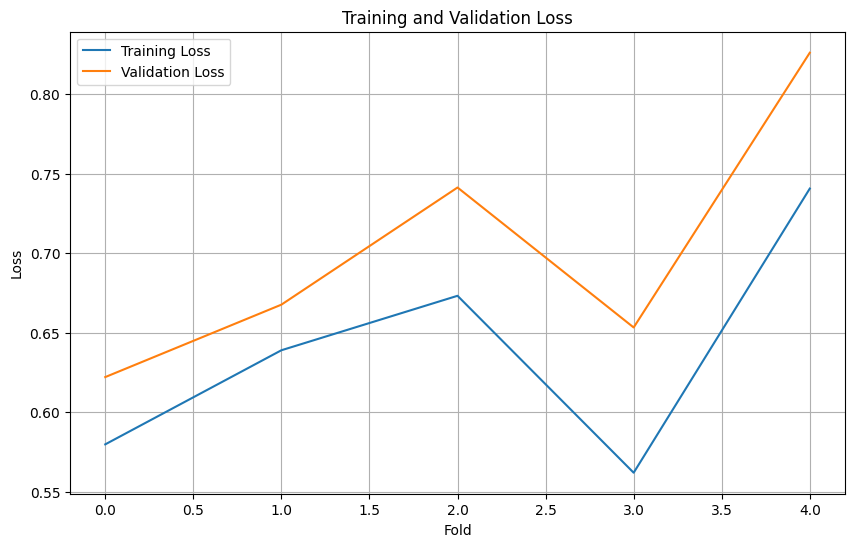

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# Model Testing and Feature Interpretation

2024-05-09 08:45:35.602161: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-09 08:45:35.602189: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-09 08:45:35.602196: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-09 08:45:35.602354: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-09 08:45:35.602384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


2024-05-09 08:45:36.026893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


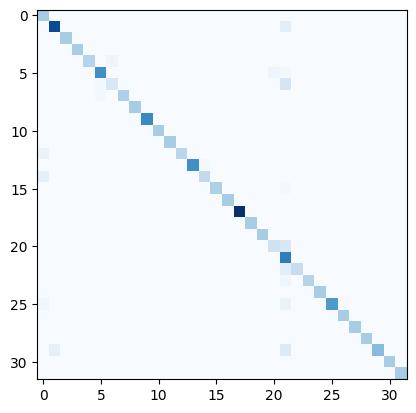

In [6]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

best_model = load_model('./data/ffn/linear_1.keras')
model_prediction = np.argmax(best_model.predict(test_datas), axis=1)
true_labels = np.argmax(test_labels, axis=1)

cfm = confusion_matrix(true_labels, model_prediction)

plt.imshow(cfm, cmap='Blues')

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ffn_acc = accuracy_score(true_labels, model_prediction)
ffn_pre = precision_score(true_labels, model_prediction, average='micro')
ffn_rec = recall_score(true_labels, model_prediction, average='micro')
ffn_f1 = f1_score(true_labels, model_prediction, average='micro')

print(f'Acc:{ffn_acc}; Prec:{ffn_pre}; Rec:{ffn_rec}; F1:{ffn_f1}')

Acc:0.9123867069486404; Prec:0.9123867069486404; Rec:0.9123867069486404; F1:0.9123867069486404


In [8]:
import shap
import numpy as np

sample_data = shap.sample(test_datas, 10)
explainer = shap.KernelExplainer(best_model, sample_data)
shap_values = explainer(sample_data)


/Volumes/NUGGET/code/projects/capstone/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10/10 [03:08<00:00, 18.87s/it]


In [11]:
import pandas as pd

avg_shap = np.mean(np.array(shap_values.values), axis=0)
shap_df = pd.DataFrame(avg_shap)
shap_df.index = records_df.columns
shap_df.columns = label_encoder.inverse_transform(shap_df.columns)
shap_df.to_csv('./data/cnn/shap.csv')

filter_shap = shap_df[~(shap_df == 0).all(axis=1)]
filter_shap

,Ae LB BS,Ae LB Ctrl,Ae LB EC,Ae LB SA,Ae MSA BS,Ae MSA Ctrl,Ae MSA EC,Ae MSA SA,Ae TSA BS,Ae TSA Ctrl,...,An MSA EC,An MSA SA,An TSA BS,An TSA Ctrl,An TSA EC,An TSA SA,An TSB BS,An TSB Ctrl,An TSB EC,An TSB SA
Compound,,,,,,,,,,,,,,,,,,,,,
Butylated Hydroxytoluene,3.417892e-04,0.000406,1.136738e-07,0.000094,0.001278,-0.000386,1.289298e-04,-0.000103,-0.000193,0.000350,...,-0.000630,0.000617,-0.000063,-0.000623,0.000017,-0.000705,0.000082,-0.001387,-0.000135,0.001133
"Cyclohexasiloxane, Dodecamethyl",-4.552645e-04,0.000377,1.262341e-06,0.000089,0.000196,0.000715,6.654288e-05,-0.000543,0.000460,0.000968,...,-0.000126,-0.000618,-0.000365,-0.001289,0.000445,-0.000434,0.000168,-0.000225,-0.000219,0.000430
"Cyclotetrasiloxane, Octamethyl",1.078018e-03,-0.000179,1.344503e-06,-0.000265,-0.000634,-0.000648,-6.895136e-05,0.001114,-0.000460,0.000681,...,-0.000040,-0.000459,0.000458,0.000510,0.000225,0.000258,-0.000012,-0.000641,-0.000111,0.000724
"Cyclotrisiloxane, Hexamethyl",-1.340602e-03,0.000227,-3.351208e-06,-0.000225,-0.001820,0.000373,-8.501774e-05,0.000110,0.000084,-0.000264,...,0.000745,-0.000013,-0.000211,0.000126,0.000331,0.000380,-0.000428,0.000374,-0.000193,0.000098
Decane,2.726408e-04,-0.001088,-7.589163e-06,-0.000440,0.000867,0.002454,3.687137e-05,-0.000185,-0.000083,-0.000766,...,-0.000070,-0.001072,-0.000807,-0.000809,-0.000454,-0.000353,0.000078,-0.000784,-0.000203,0.000101
Dodecane,2.247592e-05,-0.000520,7.117969e-06,-0.000187,0.000291,-0.001269,3.047845e-05,-0.001311,0.000108,0.000891,...,-0.000069,-0.000454,0.001032,0.000623,0.000219,-0.000089,-0.000077,0.000042,0.000040,0.000191
"Octane, 4-Methyl",-6.270105e-04,-0.000853,-2.156175e-06,-0.000182,0.000772,0.000755,-5.815893e-05,0.000462,0.000409,-0.000955,...,-0.000583,-0.000514,0.000489,0.000291,0.000158,-0.001011,-0.000121,0.000013,0.000205,-0.000134
"Pyrazine, 2,5-Dimethyl",-9.086362e-05,0.000193,-7.986977e-07,0.000800,-0.000132,-0.000100,-6.351952e-05,-0.000051,-0.000252,-0.001160,...,0.000076,0.001190,-0.000306,-0.000929,-0.000259,0.000721,-0.000355,0.001554,-0.000017,-0.000822
1-Undecene,-4.868844e-05,-0.000916,1.190335e-06,-0.000314,-0.001259,-0.000404,4.932187e-05,0.000841,0.000235,0.001692,...,-0.000289,-0.000028,0.000844,0.000330,-0.000310,-0.000692,0.000118,0.000737,0.000064,-0.000451


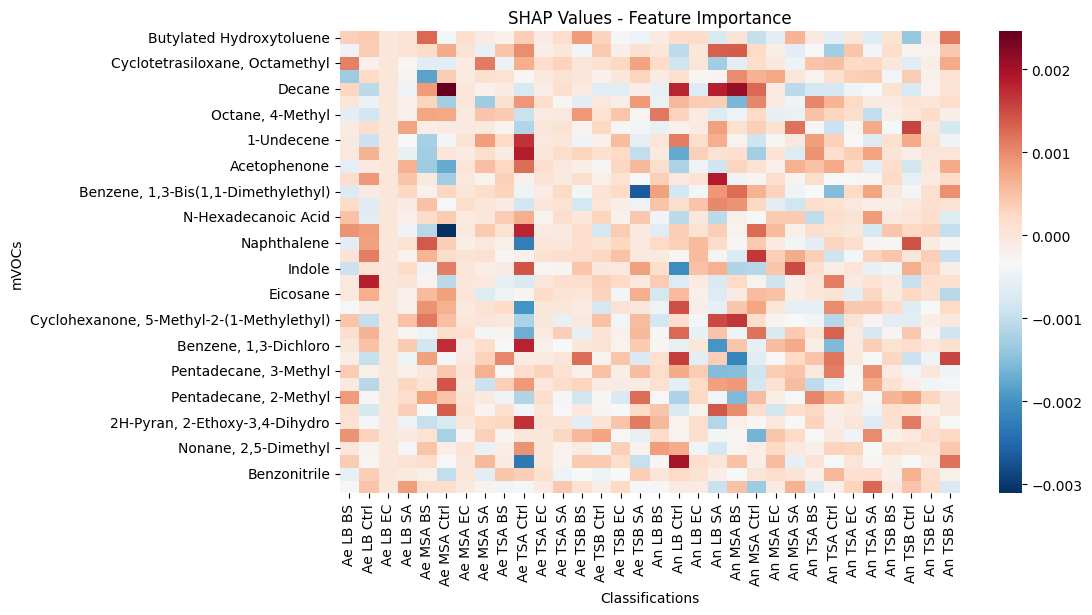

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filter_shap, cmap='RdBu_r')
plt.xlabel('Classifications')
plt.ylabel('mVOCs')
plt.title('SHAP Values - Feature Importance')
plt.savefig('./data/figures/CNN-SHAP.png', dpi=300, bbox_inches='tight')
plt.show()